In [2]:
import sys
sys.path
sys.path.append('/usr/lib/python3/dist-packages')
sys.path.append('/home/camilo/.local/lib/python3.8/site-packages')

viagens de 0:00 a 0:59: 247
viagens de 1:00 a 1:59: 235
viagens de 2:00 a 2:59: 268
viagens de 3:00 a 3:59: 441
viagens de 4:00 a 4:59: 820
viagens de 5:00 a 5:59: 1729
viagens de 6:00 a 6:59: 1824
viagens de 7:00 a 7:59: 1421
viagens de 8:00 a 8:59: 1384
viagens de 9:00 a 9:59: 1086
viagens de 10:00 a 10:59: 715
viagens de 11:00 a 11:59: 737
viagens de 12:00 a 12:59: 720
viagens de 13:00 a 13:59: 514
viagens de 14:00 a 14:59: 485
viagens de 15:00 a 15:59: 431
viagens de 16:00 a 16:59: 412
viagens de 17:00 a 17:59: 444
viagens de 18:00 a 18:59: 363
viagens de 19:00 a 19:59: 315
viagens de 20:00 a 20:59: 212
viagens de 21:00 a 21:59: 300
viagens de 22:00 a 22:59: 322
viagens de 23:00 a 23:59: 250

viagens ocorridas Segunda: 2488
viagens ocorridas Terça: 2197
viagens ocorridas Quarta: 2177
viagens ocorridas Quinta: 2254
viagens ocorridas Sexta: 2177
viagens ocorridas Sábado: 2484
viagens ocorridas Domingo: 1898

Segunda [26, 36, 18, 52, 87, 237, 328, 244, 256, 207, 134, 125, 101, 76, 69,

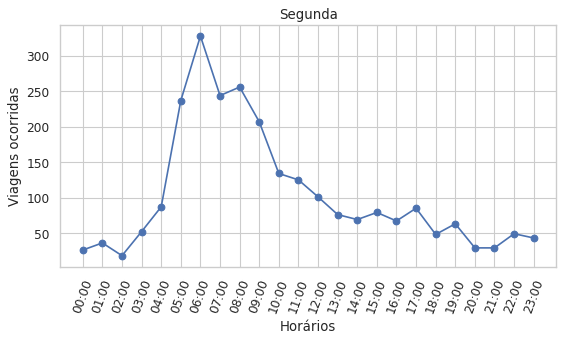

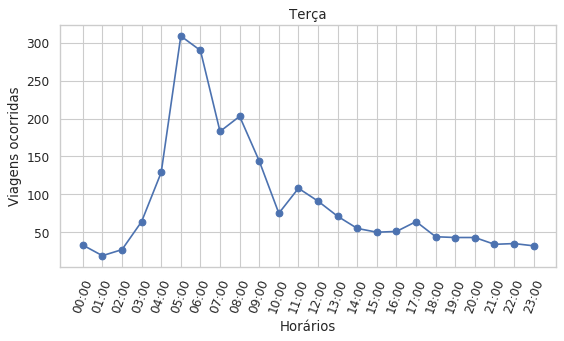

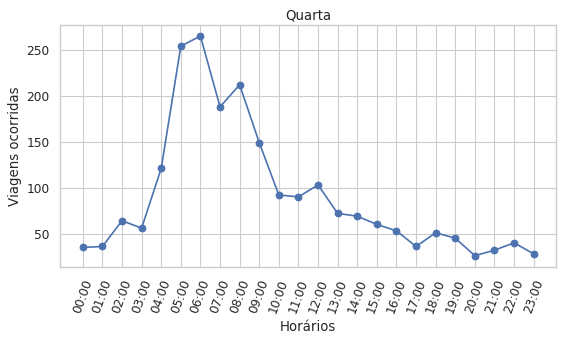

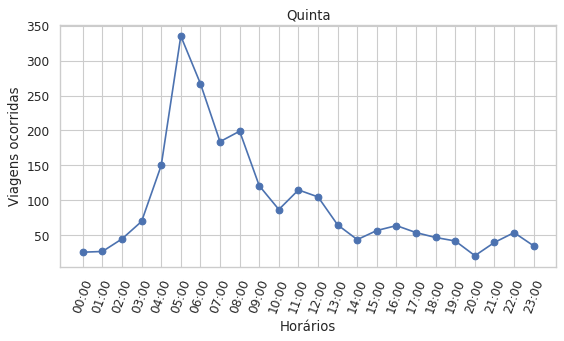

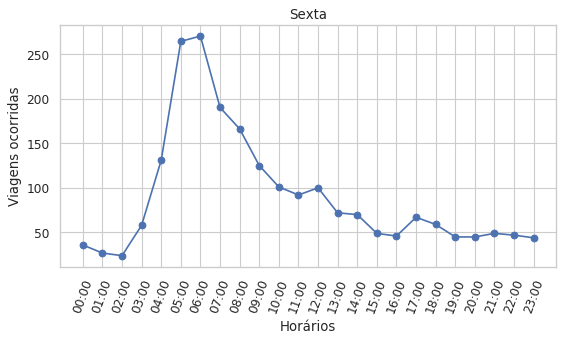

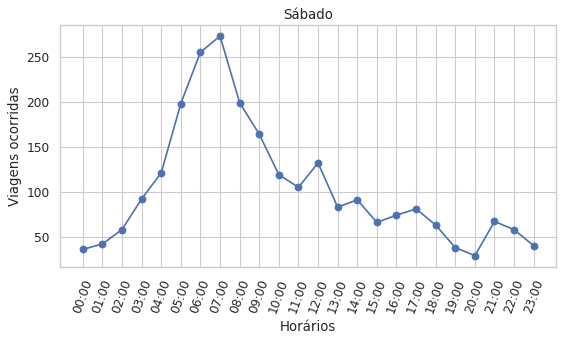

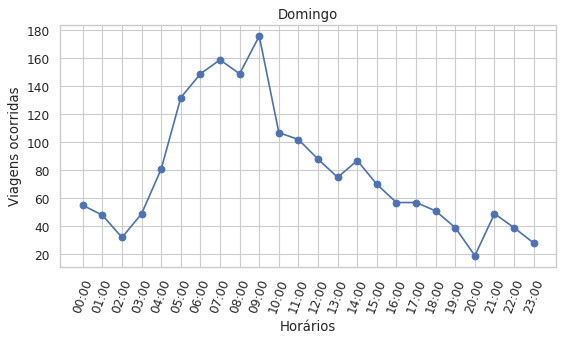

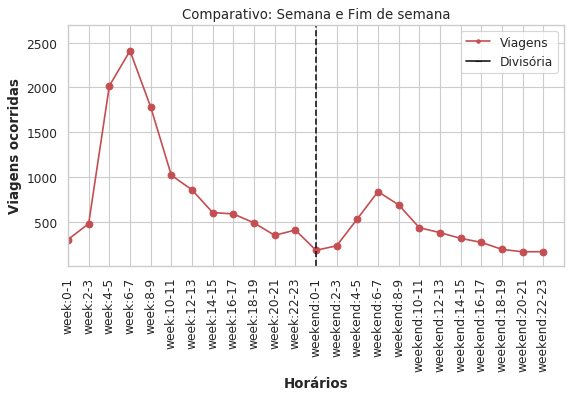

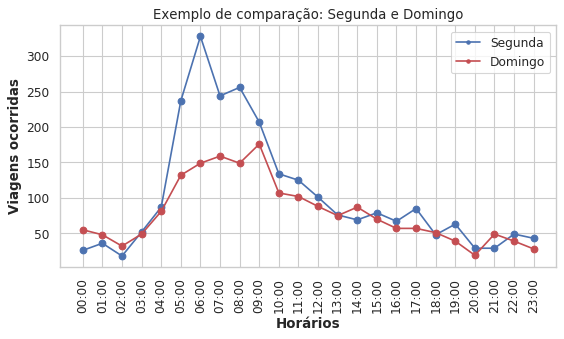

In [6]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import pandas as pd
import csv
from matplotlib.patches import Patch
from matplotlib.path import Path
from matplotlib.lines import Line2D
from datetime import datetime


directory = 'data/trips/'
file = 'twitter-sao-paulo.csv'

#data.weekday() [0-6 , segunda - domingo] ou data.isoweekday(1-7 segunda - domingo)

data = pd.read_csv(directory+file)

departure_list = data['timestamp_departure'].tolist()
arival_list = data['timestamp_arrival'].tolist()


HourList = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
DayList = [0,0,0,0,0,0,0]
day = ["Segunda","Terça","Quarta","Quinta","Sexta","Sábado","Domingo"]
lista_das_listas = []

horarios = ["00:00","01:00","02:00","03:00","04:00","05:00","06:00","07:00","08:00","09:00","10:00","11:00","12:00","13:00","14:00","15:00","16:00","17:00","18:00","19:00","20:00","21:00","22:00","23:00"]

def day_division(dayN,TripList): # conta todas as viagens ocorridas entre os 7 dias da semana (sem considerar horário)
    n = 0
    for trip in TripList:
        try:
            tti = datetime.fromtimestamp(trip)
        except:
            tti = datetime.fromtimestamp(trip/1000.0)
        if tti.isoweekday() == dayN:
            n += 1
    return n

def hour_division(hourN,TripList): # conta todas as viagens ocorridas entre as 24 horas de todos os dias da semana
    n = 0
    for trip in TripList:
        try:
            tti = datetime.fromtimestamp(trip)
        except:
            tti = datetime.fromtimestamp(trip/1000.0)
        if tti.hour == hourN:
            n += 1
    return n

def day_hour_division(dayN,TripsList): # conta todas as viagens ocorridas entre as 24 horas de um único dia
    DHList = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
    for trip in TripsList:
        try:
            tti = datetime.fromtimestamp(trip)
        except:
            tti = datetime.fromtimestamp(trip/1000.0)
        if tti.isoweekday() == dayN:
            hour = tti.hour
            DHList[hour] += 1
    return DHList
            


x = 0
while x <= 23: # contagem das viagens sobre as horas dos dias
    n = hour_division(x,departure_list)
    HourList[x] = n
    x += 1

x = 1
while x <= 7: # contagem das viagens sobre os dias da semana
    n = day_division(x,departure_list)
    DayList[x - 1] = n
    x += 1

x = 0
for i in HourList: # horários do dia sobre todos os dias da semana
    print("viagens de %d:00 a %d:59: %d" % (x,x,HourList[x]))
    x += 1

print()
    
x = 0
for i in DayList: # viagens de cada dia da semana
    print("viagens ocorridas %s: %d" % (day[x],DayList[x]))
    x += 1

print()

x = 1
while x <= 7: # horários do dia sobre um único dia da semana
    L = day_hour_division(x,departure_list)
    lista_das_listas.append(L)
    print(day[x-1],L)
    x += 1

print()


#geração de gráfico:
#gráfico como os dias e viagens:

def SomaColuna(matrix):
    return np.sum(matrix, axis=0)


listaSemana = [lista_das_listas[0],lista_das_listas[1],lista_das_listas[2],lista_das_listas[3],lista_das_listas[4]]
listaFim = [lista_das_listas[5],lista_das_listas[6]]

semana = SomaColuna(listaSemana)
fimDeSemana = SomaColuna(listaFim)

S = []

for i in range(0,24,2):
    x = semana[i] + semana[i+1]
    S.append(x)

for i in range(0,24,2):
    x = fimDeSemana[i] + fimDeSemana[i+1]
    S.append(x)

for i in range(0,7):
    plt_1 = plt.figure(figsize=(8, 4), dpi=80)
    plt.plot(horarios,lista_das_listas[i],'b-o')
    plt.title(day[i], fontdict=None, loc='center', pad=None)
    plt.xlabel("Horários")
    plt.ylabel("Viagens ocorridas")
    plt.xticks(rotation = 70)
    plt.show()


verts = [(10,2000),(20,2000),(10,1000),(20,1000)]
codes = [Path.MOVETO,Path.MOVETO,Path.MOVETO,Path.MOVETO]
path = Path(verts, codes)
#patch = mpatches.PathPatch(path, facecolor='none', lw=2)
#plt.add_patch(patch)

H = ["week:0-1","week:2-3","week:4-5","week:6-7","week:8-9","week:10-11","week:12-13","week:14-15","week:16-17","week:18-19","week:20-21","week:22-23","weekend:0-1","weekend:2-3","weekend:4-5","weekend:6-7","weekend:8-9","weekend:10-11","weekend:12-13","weekend:14-15","weekend:16-17","weekend:18-19","weekend:20-21","weekend:22-23"]
x1, y1 = [12, 12], [0, 2710]
plt_1 = plt.figure(figsize=(8, 4), dpi=80)
lineH = plt.plot(H,S,'r-o')
lineV = plt.plot(x1, y1,'k--')
plt.title("Comparativo: Semana e Fim de semana", fontdict=None, loc='center', pad=None)
plt.xlabel("Horários",fontweight='bold')
plt.ylabel("Viagens ocorridas",fontweight='bold')
plt.xticks(rotation = 90)
plt.ylim(1,2700)
plt.xlim(0,24)
elementos = [Line2D([0],[0], color = 'r',marker=".",label = 'Viagens'),
             Line2D([0],[0],color = 'k',marker="_",label = 'Divisória')]
plt.legend(handles=elementos,loc='upper right')
sns.set(style="whitegrid")
#plt.savefig('data/results/plots/week-weekend-hours.png')
plt.show()

plt_1 = plt.figure(figsize=(8, 4), dpi=80)
plt.plot(horarios,lista_das_listas[0],'b-o')
plt.plot(horarios,lista_das_listas[6],'r-o')
plt.title("Exemplo de comparação: Segunda e Domingo", fontdict=None, loc='center', pad=None)
plt.xlabel("Horários",fontweight='bold')
plt.ylabel("Viagens ocorridas",fontweight='bold')
plt.xticks(rotation = 90)
elementos = [Line2D([0],[0], color = 'b',marker=".",label = 'Segunda'),
             Line2D([0],[0],color = 'r',marker=".",label = 'Domingo')]
plt.legend(handles=elementos,loc='upper right')
#plt.savefig('data/results/plots/exemplo-comparação.png')
plt.show()

#dia da semana com a maior quantidade de viagens: segunda
#dia do final de semana com a maior quantidade de viagens: sábado